In [30]:
import json
import re
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display, clear_output

def get_jpg_paths(directory):
    img_path_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                img_path = os.path.join(root, file)
                img_path_list.append(img_path)
    return img_path_list

dataset_dir_path = "/root/dataset/Manga109_landmark_croped"
img_path_list = get_jpg_paths(dataset_dir_path)
# img_path_list

In [31]:
def get_file_names(directory):
    file_names = []
    for file_name in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file_name)):
            file_names.append(file_name)
    return file_names

def json_to_dir(data_set_dir):
    # すべてのjsonファイルを確認する
    json_file_names = get_file_names(data_set_dir)
    
    json_all_dirs = {}
    for json_file in json_file_names:
        json_file_path = f"{data_set_dir}/{json_file}"
        with open(json_file_path,"r") as f:
            json_dir = json.load(f)

        json_image_name = json_dir["Image"]
        match = re.search(r'(\w+)_(\d+)_(face\d+)', json_image_name)
        if match:  # パターンが見つかった場合
            title = match.group(1)
            page_num = str(int(match.group(2)))
            face_num = match.group(3)
        if title not in json_all_dirs:
            json_all_dirs[title] = {}
        if page_num not in json_all_dirs[title]:
            json_all_dirs[title][page_num] = {}
        json_all_dirs[title][page_num][face_num] = json_dir["Face"]
    return json_all_dirs

In [32]:
json_path = "/root/dataset/Manga109_landmark_croped/landmarksUser"
json_dirs = json_to_dir(json_path)

In [33]:
json_dirs["MomoyamaHaikagura"]["23"]["face01"]

{'ChinContour': {'Contour': [[38.70419426048565, 75.44370860927152],
   [38.507726269315675, 75.6401766004415],
   [38.311258278145694, 75.6401766004415],
   [38.311258278145694, 75.83664459161147],
   [38.11479028697572, 76.03311258278146],
   [38.11479028697572, 76.22958057395144],
   [38.11479028697572, 76.42604856512142],
   [37.91832229580574, 76.42604856512142],
   [37.91832229580574, 76.62251655629139],
   [37.72185430463576, 76.81898454746137],
   [37.72185430463576, 77.01545253863135],
   [37.52538631346579, 77.21192052980133],
   [37.52538631346579, 77.4083885209713],
   [37.52538631346579, 77.60485651214128],
   [37.328918322295806, 77.80132450331126],
   [37.13245033112583, 77.99779249448123],
   [37.13245033112583, 78.19426048565121],
   [36.93598233995585, 78.19426048565121],
   [36.93598233995585, 78.3907284768212],
   [36.739514348785875, 78.58719646799118],
   [36.739514348785875, 78.78366445916114],
   [36.54304635761589, 78.98013245033113],
   [36.54304635761589, 79.

In [36]:
miss_landmark = []

一つ前のjsonファイル RisingGirl_20_face01.json
/root/dataset/Manga109_landmark_croped/RisingGirl/images/RisingGirl_29_face00.jpg
RisingGirl_29_face00.jpg
<class 'tuple'>


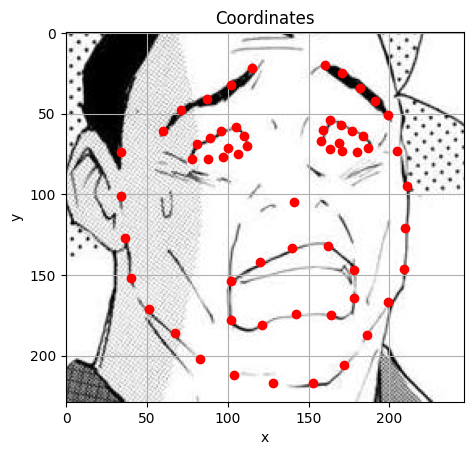

['MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg', 'MiraiSan_28_face01.jpg', 'MiraiSan_49_face00.jpg', 'MiraiSan_7_face07.jpg', 'MiraiSan_26_face01.jpg', 'MiraiSan_46_face00.jpg', 'MiraiSan_21_face03.jpg', 'MiraiSan_34_face02.jpg', 'PikaruGenkiDesu_32_face0

In [45]:
json_file_name_old = ""
for img_path_num,img_path in enumerate(img_path_list[1200:]):
    clear_output(wait=True)
    print("一つ前のjsonファイル",json_file_name_old)
    print(img_path)
    image_name = img_path.split("/")[-1]
    print(image_name)
    img = Image.open(img_path).convert("L")
    # _, ax = plt.subplots(1)
    # ax.imshow(img)
    
    img_width,img_height = img.size
    
    
    img_name = img_path.split("/")[-1]    
    m = re.match(r'(.*)_(\d+)_face(\d+)\.jpg', img_name)
    name,number,face = m.groups()
    # print(name,number,face)
    json_landmark_data = json_dirs[name][number][f"face{face}"]
    # print(json_landmark_data)
    
    face_parts = ["ChinContour","LeftEye","LeftEyeBrow","LeftPupil","Mouth","Nose","RightEye","RightEyeBrow","RightPupil"]

    all_coordinates = []
    # print(json_file["Image"])
    for part in face_parts:
        try:
            points_lists = json_landmark_data[part]["Landmarks"]
            for point in points_lists:
                all_coordinates.append(point)
        except Exception as e:
            print(e)
            continue

    x, y = zip(*all_coordinates)

    # x座標をnumpy配列に変換
    x_np = np.array(x)
    y_np = np.array(y)
    
    small_x_np = x_np - min(x_np) + 10
    small_y_np = y_np - min(y_np) + 10
    
    check_num_x = int(img_width - max(small_x_np)) - 10
    check_num_y = int(img_height - max(small_y_np)) - 10
    
    
    # for x_pattern in range(check_num_x):
    #     small_x_np += 1
    #     small_y_np = y_np - min(y_np)
    #     for y_pattern in range(check_num_y):
    #         small_y_np += 1    
    
    img_np = np.array(img)

    # 初期値設定
    # 初期値設定
    min_value = np.inf
    min_coords = []
    
    offset_x = 0
    offset_y = 0

    # 各ランドマークについて処理
    for x_offset in range(check_num_x):
        for y_offset in range(check_num_y):
            
            current_coords = []
            current_value = 0
            
            # 各ランドマーク座標について処理
            for i in range(len(small_x_np)):
                x, y = int(small_x_np[i] + x_offset), int(small_y_np[i] + y_offset)  # xとyを整数にキャスト
                # xとyが画像の範囲内にあることを確認（0から始まるインデックスを想定）
                if 0 <= x < img_np.shape[1] and 0 <= y < img_np.shape[0]:
                    # グレースケールの値を取得（0が最も暗く、255が最も明るい）し、合計する
                    current_value += img_np[y][x]
                    current_coords.append((x, y))
            
            # もし値が最小値より小さいなら、その値と座標を記録
            if current_value < min_value:
                min_value = current_value
                min_coords = current_coords
                offset_x = x_offset
                offset_y = y_offset

    # print(f"Most dark landmark's coordinates: {type(min_coords)}")
    diff_x = int(offset_x) - min(x_np) + 10 
    diff_y = int(offset_y) - min(y_np) + 10
    
    try:
        min_coords_np = np.array(min_coords)
        x, y = zip(*min_coords)
        print(type(x))
        

        # 画像を読み込んで表示する

        _, ax = plt.subplots(1)
        ax.imshow(img,cmap="gray")
        plt.plot(x, y, 'o',color='red')  # 点と点を線でつなぐプロットを作成
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Coordinates')
        plt.grid(True)
        # plt.gca().invert_yaxis()
        plt.show()
    except Exception as e:
        print(e)
        continue
    
    user_input = input("Enter something: ")
    if user_input == "":  # Enterが押された場合
        # print("You pressed Enter!")
        face_landmarks_data_dir = {}
        face_parts = ["ChinContour","LeftEye","LeftEyeBrow","LeftPupil","Mouth","Nose","RightEye","RightEyeBrow","RightPupil"]
        # face_landmarks_data_dir = {}
        for part in face_parts:
            # face_landmarks_data_dir[landmark_list] = {}
            try:
                points_lists = json_landmark_data[part]["Landmarks"]
                adjusted_points_lists = points_lists + np.array([diff_x,diff_y])
                adjusted_points_lists = adjusted_points_lists.tolist()
                face_landmarks_data_dir[part] = adjusted_points_lists
            except Exception as e:
                print(e)
                face_landmarks_data_dir[part] = []
                
            
        json_file_name = image_name.replace(".jpg",".json")
        json_file_name_old = json_file_name
        with open(f"./annotation_json/{json_file_name}", "a") as f:
            json.dump(face_landmarks_data_dir, f)
        

        # ここにEnterが押されたときの処理を書く
        # print(face_landmarks_data_dir)
    elif user_input == " ":  # スペースが入力された場合
        
        # print("You pressed Space!")
        # ここにスペースが入力されたときの処理を書く
        miss_landmark.append(image_name)
    elif user_input.lower() == "quit":  # 'quit'が入力された場合
        break  # ループを終了
    else:
        print(f"You entered: {user_input}")
    
    # time.sleep(0.01)
    # clear_output(wait=True)
    
print(miss_landmark)

In [46]:
list_6 =['OhWareraRettouSeitokai_40_face05.jpg','MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg']
list_0 =['MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg', 'MiraiSan_28_face01.jpg', 'MiraiSan_49_face00.jpg', 'MiraiSan_7_face07.jpg', 'MiraiSan_26_face01.jpg', 'MiraiSan_46_face00.jpg', 'MiraiSan_21_face03.jpg', 'MiraiSan_34_face02.jpg', 'PikaruGenkiDesu_32_face01.jpg', 'PikaruGenkiDesu_37_face00.jpg', 'PikaruGenkiDesu_47_face00.jpg', 'Nekodama_6_face05.jpg', 'Nekodama_19_face01.jpg', 'Nekodama_39_face00.jpg', 'Nekodama_18_face02.jpg', 'Nekodama_45_face01.jpg', 'Nekodama_4_face03.jpg', 'Nekodama_49_face00.jpg', 'Nekodama_30_face02.jpg', 'Nekodama_22_face01.jpg', 'Nekodama_22_face02.jpg', 'Raphael_33_face03.jpg', 'Raphael_35_face04.jpg', 'Raphael_11_face01.jpg', 'Raphael_44_face06.jpg', 'Raphael_28_face03.jpg', 'Raphael_33_face00.jpg']
list_1 =['MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg', 'MiraiSan_28_face01.jpg', 'MiraiSan_49_face00.jpg', 'MiraiSan_7_face07.jpg', 'MiraiSan_26_face01.jpg', 'MiraiSan_46_face00.jpg', 'MiraiSan_21_face03.jpg', 'MiraiSan_34_face02.jpg', 'PikaruGenkiDesu_32_face01.jpg', 'PikaruGenkiDesu_37_face00.jpg', 'PikaruGenkiDesu_47_face00.jpg', 'Nekodama_6_face05.jpg', 'Nekodama_19_face01.jpg', 'Nekodama_39_face00.jpg', 'Nekodama_18_face02.jpg', 'Nekodama_45_face01.jpg', 'Nekodama_4_face03.jpg', 'Nekodama_49_face00.jpg', 'Nekodama_30_face02.jpg', 'Nekodama_22_face01.jpg', 'Nekodama_22_face02.jpg', 'Raphael_33_face03.jpg', 'Raphael_35_face04.jpg', 'Raphael_11_face01.jpg', 'Raphael_44_face06.jpg', 'Raphael_28_face03.jpg', 'Raphael_33_face00.jpg', 'NichijouSoup_39_face00.jpg', 'NichijouSoup_17_face01.jpg', 'NichijouSoup_14_face01.jpg', 'NichijouSoup_4_face04.jpg', 'NichijouSoup_15_face06.jpg', 'NichijouSoup_25_face05.jpg', 'NichijouSoup_29_face02.jpg', 'NichijouSoup_15_face03.jpg', 'Ningyoushi_6_face05.jpg', 'Ningyoushi_22_face02.jpg', 'Ningyoushi_20_face01.jpg', 'Ningyoushi_5_face01.jpg', 'Ningyoushi_52_face01.jpg', 'Ningyoushi_42_face01.jpg', 'Ningyoushi_51_face02.jpg', 'Ningyoushi_53_face01.jpg', 'ParaisoRoad_20_face00.jpg']
list_2 =['PrayerHaNemurenai_42_face02.jpg','MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg', 'MiraiSan_28_face01.jpg', 'MiraiSan_49_face00.jpg', 'MiraiSan_7_face07.jpg', 'MiraiSan_26_face01.jpg', 'MiraiSan_46_face00.jpg', 'MiraiSan_21_face03.jpg', 'MiraiSan_34_face02.jpg', 'PikaruGenkiDesu_32_face01.jpg', 'PikaruGenkiDesu_37_face00.jpg', 'PikaruGenkiDesu_47_face00.jpg', 'Nekodama_6_face05.jpg', 'Nekodama_19_face01.jpg', 'Nekodama_39_face00.jpg', 'Nekodama_18_face02.jpg', 'Nekodama_45_face01.jpg', 'Nekodama_4_face03.jpg', 'Nekodama_49_face00.jpg', 'Nekodama_30_face02.jpg', 'Nekodama_22_face01.jpg', 'Nekodama_22_face02.jpg', 'Raphael_33_face03.jpg', 'Raphael_35_face04.jpg', 'Raphael_11_face01.jpg', 'Raphael_44_face06.jpg', 'Raphael_28_face03.jpg', 'Raphael_33_face00.jpg', 'NichijouSoup_39_face00.jpg', 'NichijouSoup_17_face01.jpg', 'NichijouSoup_14_face01.jpg', 'NichijouSoup_4_face04.jpg', 'NichijouSoup_15_face06.jpg', 'NichijouSoup_25_face05.jpg', 'NichijouSoup_29_face02.jpg', 'NichijouSoup_15_face03.jpg', 'Ningyoushi_6_face05.jpg', 'Ningyoushi_22_face02.jpg', 'Ningyoushi_20_face01.jpg', 'Ningyoushi_5_face01.jpg', 'Ningyoushi_52_face01.jpg', 'Ningyoushi_42_face01.jpg', 'Ningyoushi_51_face02.jpg', 'Ningyoushi_53_face01.jpg', 'ParaisoRoad_20_face00.jpg', 'PrayerHaNemurenai_31_face02.jpg', 'PrayerHaNemurenai_22_face03.jpg', 'PrayerHaNemurenai_58_face00.jpg', 'PrayerHaNemurenai_54_face01.jpg', 'PrayerHaNemurenai_22_face00.jpg', 'PrayerHaNemurenai_37_face01.jpg', 'PrayerHaNemurenai_24_face03.jpg', 'PrayerHaNemurenai_65_face00.jpg', 'PrayerHaNemurenai_51_face03.jpg', 'PrayerHaNemurenai_36_face00.jpg', 'PrayerHaNemurenai_48_face02.jpg', 'PrayerHaNemurenai_60_face01.jpg', 'PrayerHaNemurenai_26_face00.jpg', 'PrayerHaNemurenai_47_face02.jpg', 'PrayerHaNemurenai_27_face03.jpg', 'PrayerHaNemurenai_24_face01.jpg', 'PrayerHaNemurenai_60_face03.jpg', 'PrayerHaNemurenai_46_face01.jpg', 'PrayerHaNemurenai_48_face01.jpg', 'PrayerHaNemurenai_20_face05.jpg', 'PrayerHaNemurenai_32_face00.jpg', 'PrayerHaNemurenai_59_face02.jpg', 'PsychoStaff_54_face01.jpg']
list_3 =['OL_Lunch_18_face03.jpg','OL_Lunch_30_face02.jpg','RinToSiteSippuNoNaka_46_face02.jpg','MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg', 'MiraiSan_28_face01.jpg', 'MiraiSan_49_face00.jpg', 'MiraiSan_7_face07.jpg', 'MiraiSan_26_face01.jpg', 'MiraiSan_46_face00.jpg', 'MiraiSan_21_face03.jpg', 'MiraiSan_34_face02.jpg', 'PikaruGenkiDesu_32_face01.jpg', 'PikaruGenkiDesu_37_face00.jpg', 'PikaruGenkiDesu_47_face00.jpg', 'Nekodama_6_face05.jpg', 'Nekodama_19_face01.jpg', 'Nekodama_39_face00.jpg', 'Nekodama_18_face02.jpg', 'Nekodama_45_face01.jpg', 'Nekodama_4_face03.jpg', 'Nekodama_49_face00.jpg', 'Nekodama_30_face02.jpg', 'Nekodama_22_face01.jpg', 'Nekodama_22_face02.jpg', 'Raphael_33_face03.jpg', 'Raphael_35_face04.jpg', 'Raphael_11_face01.jpg', 'Raphael_44_face06.jpg', 'Raphael_28_face03.jpg', 'Raphael_33_face00.jpg', 'NichijouSoup_39_face00.jpg', 'NichijouSoup_17_face01.jpg', 'NichijouSoup_14_face01.jpg', 'NichijouSoup_4_face04.jpg', 'NichijouSoup_15_face06.jpg', 'NichijouSoup_25_face05.jpg', 'NichijouSoup_29_face02.jpg', 'NichijouSoup_15_face03.jpg', 'Ningyoushi_6_face05.jpg', 'Ningyoushi_22_face02.jpg', 'Ningyoushi_20_face01.jpg', 'Ningyoushi_5_face01.jpg', 'Ningyoushi_52_face01.jpg', 'Ningyoushi_42_face01.jpg', 'Ningyoushi_51_face02.jpg', 'Ningyoushi_53_face01.jpg', 'ParaisoRoad_20_face00.jpg', 'PrayerHaNemurenai_31_face02.jpg', 'PrayerHaNemurenai_22_face03.jpg', 'PrayerHaNemurenai_58_face00.jpg', 'PrayerHaNemurenai_54_face01.jpg', 'PrayerHaNemurenai_22_face00.jpg', 'PrayerHaNemurenai_37_face01.jpg', 'PrayerHaNemurenai_24_face03.jpg', 'PrayerHaNemurenai_65_face00.jpg', 'PrayerHaNemurenai_51_face03.jpg', 'PrayerHaNemurenai_36_face00.jpg', 'PrayerHaNemurenai_48_face02.jpg', 'PrayerHaNemurenai_60_face01.jpg', 'PrayerHaNemurenai_26_face00.jpg', 'PrayerHaNemurenai_47_face02.jpg', 'PrayerHaNemurenai_27_face03.jpg', 'PrayerHaNemurenai_24_face01.jpg', 'PrayerHaNemurenai_60_face03.jpg', 'PrayerHaNemurenai_46_face01.jpg', 'PrayerHaNemurenai_48_face01.jpg', 'PrayerHaNemurenai_20_face05.jpg', 'PrayerHaNemurenai_32_face00.jpg', 'PrayerHaNemurenai_59_face02.jpg', 'PsychoStaff_54_face01.jpg', 'PsychoStaff_19_face02.jpg', 'PsychoStaff_22_face00.jpg', 'PsychoStaff_48_face00.jpg', 'MeteoSanStrikeDesu_21_face00.jpg', 'MeteoSanStrikeDesu_53_face02.jpg', 'MeteoSanStrikeDesu_53_face03.jpg', 'MeteoSanStrikeDesu_25_face00.jpg', 'MeteoSanStrikeDesu_42_face00.jpg', 'RinToSiteSippuNoNaka_3_face02.jpg', 'RinToSiteSippuNoNaka_46_face01.jpg', 'RinToSiteSippuNoNaka_23_face02.jpg', 'RinToSiteSippuNoNaka_37_face04.jpg']
list_4 =['PlatinumJungle_12_face00.jpg','MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg', 'MiraiSan_28_face01.jpg', 'MiraiSan_49_face00.jpg', 'MiraiSan_7_face07.jpg', 'MiraiSan_26_face01.jpg', 'MiraiSan_46_face00.jpg', 'MiraiSan_21_face03.jpg', 'MiraiSan_34_face02.jpg', 'PikaruGenkiDesu_32_face01.jpg', 'PikaruGenkiDesu_37_face00.jpg', 'PikaruGenkiDesu_47_face00.jpg', 'Nekodama_6_face05.jpg', 'Nekodama_19_face01.jpg', 'Nekodama_39_face00.jpg', 'Nekodama_18_face02.jpg', 'Nekodama_45_face01.jpg', 'Nekodama_4_face03.jpg', 'Nekodama_49_face00.jpg', 'Nekodama_30_face02.jpg', 'Nekodama_22_face01.jpg', 'Nekodama_22_face02.jpg', 'Raphael_33_face03.jpg', 'Raphael_35_face04.jpg', 'Raphael_11_face01.jpg', 'Raphael_44_face06.jpg', 'Raphael_28_face03.jpg', 'Raphael_33_face00.jpg', 'NichijouSoup_39_face00.jpg', 'NichijouSoup_17_face01.jpg', 'NichijouSoup_14_face01.jpg', 'NichijouSoup_4_face04.jpg', 'NichijouSoup_15_face06.jpg', 'NichijouSoup_25_face05.jpg', 'NichijouSoup_29_face02.jpg', 'NichijouSoup_15_face03.jpg', 'Ningyoushi_6_face05.jpg', 'Ningyoushi_22_face02.jpg', 'Ningyoushi_20_face01.jpg', 'Ningyoushi_5_face01.jpg', 'Ningyoushi_52_face01.jpg', 'Ningyoushi_42_face01.jpg', 'Ningyoushi_51_face02.jpg', 'Ningyoushi_53_face01.jpg', 'ParaisoRoad_20_face00.jpg', 'PrayerHaNemurenai_31_face02.jpg', 'PrayerHaNemurenai_22_face03.jpg', 'PrayerHaNemurenai_58_face00.jpg', 'PrayerHaNemurenai_54_face01.jpg', 'PrayerHaNemurenai_22_face00.jpg', 'PrayerHaNemurenai_37_face01.jpg', 'PrayerHaNemurenai_24_face03.jpg', 'PrayerHaNemurenai_65_face00.jpg', 'PrayerHaNemurenai_51_face03.jpg', 'PrayerHaNemurenai_36_face00.jpg', 'PrayerHaNemurenai_48_face02.jpg', 'PrayerHaNemurenai_60_face01.jpg', 'PrayerHaNemurenai_26_face00.jpg', 'PrayerHaNemurenai_47_face02.jpg', 'PrayerHaNemurenai_27_face03.jpg', 'PrayerHaNemurenai_24_face01.jpg', 'PrayerHaNemurenai_60_face03.jpg', 'PrayerHaNemurenai_46_face01.jpg', 'PrayerHaNemurenai_48_face01.jpg', 'PrayerHaNemurenai_20_face05.jpg', 'PrayerHaNemurenai_32_face00.jpg', 'PrayerHaNemurenai_59_face02.jpg', 'PsychoStaff_54_face01.jpg', 'PsychoStaff_19_face02.jpg', 'PsychoStaff_22_face00.jpg', 'PsychoStaff_48_face00.jpg', 'MeteoSanStrikeDesu_21_face00.jpg', 'MeteoSanStrikeDesu_53_face02.jpg', 'MeteoSanStrikeDesu_53_face03.jpg', 'MeteoSanStrikeDesu_25_face00.jpg', 'MeteoSanStrikeDesu_42_face00.jpg', 'RinToSiteSippuNoNaka_3_face02.jpg', 'RinToSiteSippuNoNaka_46_face01.jpg', 'RinToSiteSippuNoNaka_23_face02.jpg', 'RinToSiteSippuNoNaka_37_face04.jpg', 'OL_Lunch_33_face04.jpg', 'OL_Lunch_54_face00.jpg', 'OL_Lunch_7_face09.jpg', 'OL_Lunch_42_face05.jpg', 'OL_Lunch_12_face03.jpg', 'OL_Lunch_28_face05.jpg', 'OL_Lunch_16_face00.jpg', 'OL_Lunch_25_face10.jpg', 'OL_Lunch_22_face08.jpg', 'OL_Lunch_6_face19.jpg', 'OL_Lunch_7_face05.jpg', 'OL_Lunch_48_face03.jpg', 'OL_Lunch_10_face05.jpg', 'OL_Lunch_48_face06.jpg', 'OL_Lunch_47_face01.jpg', 'OL_Lunch_14_face03.jpg', 'OL_Lunch_18_face01.jpg', 'OL_Lunch_35_face01.jpg', 'OL_Lunch_19_face03.jpg', 'OL_Lunch_6_face00.jpg', 'OL_Lunch_28_face01.jpg', 'OL_Lunch_36_face05.jpg', 'OL_Lunch_44_face01.jpg', 'OL_Lunch_21_face07.jpg', 'OL_Lunch_24_face04.jpg', 'OL_Lunch_31_face07.jpg', 'OL_Lunch_33_face02.jpg', 'OL_Lunch_38_face01.jpg', 'OL_Lunch_14_face05.jpg', 'OL_Lunch_6_face01.jpg', 'OL_Lunch_29_face04.jpg']
list_5 =['MomoyamaHaikagura_34_face01.jpg', 'MomoyamaHaikagura_38_face02.jpg', 'OhWareraRettouSeitokai_54_face02.jpg', 'OhWareraRettouSeitokai_13_face07.jpg', 'OhWareraRettouSeitokai_50_face02.jpg', 'OhWareraRettouSeitokai_41_face03.jpg', 'OhWareraRettouSeitokai_52_face06.jpg', 'OhWareraRettouSeitokai_43_face00.jpg', 'OhWareraRettouSeitokai_20_face00.jpg', 'OhWareraRettouSeitokai_45_face01.jpg', 'OhWareraRettouSeitokai_46_face03.jpg', 'MiraiSan_49_face01.jpg', 'MiraiSan_21_face00.jpg', 'MiraiSan_21_face04.jpg', 'MiraiSan_22_face00.jpg', 'MiraiSan_52_face02.jpg', 'MiraiSan_39_face02.jpg', 'MiraiSan_30_face03.jpg', 'MiraiSan_7_face06.jpg', 'MiraiSan_22_face05.jpg', 'MiraiSan_30_face01.jpg', 'MiraiSan_29_face01.jpg', 'MiraiSan_44_face00.jpg', 'MiraiSan_40_face00.jpg', 'MiraiSan_47_face05.jpg', 'MiraiSan_28_face01.jpg', 'MiraiSan_49_face00.jpg', 'MiraiSan_7_face07.jpg', 'MiraiSan_26_face01.jpg', 'MiraiSan_46_face00.jpg', 'MiraiSan_21_face03.jpg', 'MiraiSan_34_face02.jpg', 'PikaruGenkiDesu_32_face01.jpg', 'PikaruGenkiDesu_37_face00.jpg', 'PikaruGenkiDesu_47_face00.jpg', 'Nekodama_6_face05.jpg', 'Nekodama_19_face01.jpg', 'Nekodama_39_face00.jpg', 'Nekodama_18_face02.jpg', 'Nekodama_45_face01.jpg', 'Nekodama_4_face03.jpg', 'Nekodama_49_face00.jpg', 'Nekodama_30_face02.jpg', 'Nekodama_22_face01.jpg', 'Nekodama_22_face02.jpg', 'Raphael_33_face03.jpg', 'Raphael_35_face04.jpg', 'Raphael_11_face01.jpg', 'Raphael_44_face06.jpg', 'Raphael_28_face03.jpg', 'Raphael_33_face00.jpg', 'NichijouSoup_39_face00.jpg', 'NichijouSoup_17_face01.jpg', 'NichijouSoup_14_face01.jpg', 'NichijouSoup_4_face04.jpg', 'NichijouSoup_15_face06.jpg', 'NichijouSoup_25_face05.jpg', 'NichijouSoup_29_face02.jpg', 'NichijouSoup_15_face03.jpg', 'Ningyoushi_6_face05.jpg', 'Ningyoushi_22_face02.jpg', 'Ningyoushi_20_face01.jpg', 'Ningyoushi_5_face01.jpg', 'Ningyoushi_52_face01.jpg', 'Ningyoushi_42_face01.jpg', 'Ningyoushi_51_face02.jpg', 'Ningyoushi_53_face01.jpg', 'ParaisoRoad_20_face00.jpg', 'PrayerHaNemurenai_31_face02.jpg', 'PrayerHaNemurenai_22_face03.jpg', 'PrayerHaNemurenai_58_face00.jpg', 'PrayerHaNemurenai_54_face01.jpg', 'PrayerHaNemurenai_22_face00.jpg', 'PrayerHaNemurenai_37_face01.jpg', 'PrayerHaNemurenai_24_face03.jpg', 'PrayerHaNemurenai_65_face00.jpg', 'PrayerHaNemurenai_51_face03.jpg', 'PrayerHaNemurenai_36_face00.jpg', 'PrayerHaNemurenai_48_face02.jpg', 'PrayerHaNemurenai_60_face01.jpg', 'PrayerHaNemurenai_26_face00.jpg', 'PrayerHaNemurenai_47_face02.jpg', 'PrayerHaNemurenai_27_face03.jpg', 'PrayerHaNemurenai_24_face01.jpg', 'PrayerHaNemurenai_60_face03.jpg', 'PrayerHaNemurenai_46_face01.jpg', 'PrayerHaNemurenai_48_face01.jpg', 'PrayerHaNemurenai_20_face05.jpg', 'PrayerHaNemurenai_32_face00.jpg', 'PrayerHaNemurenai_59_face02.jpg', 'PsychoStaff_54_face01.jpg', 'PsychoStaff_19_face02.jpg', 'PsychoStaff_22_face00.jpg', 'PsychoStaff_48_face00.jpg', 'MeteoSanStrikeDesu_21_face00.jpg', 'MeteoSanStrikeDesu_53_face02.jpg', 'MeteoSanStrikeDesu_53_face03.jpg', 'MeteoSanStrikeDesu_25_face00.jpg', 'MeteoSanStrikeDesu_42_face00.jpg', 'RinToSiteSippuNoNaka_3_face02.jpg', 'RinToSiteSippuNoNaka_46_face01.jpg', 'RinToSiteSippuNoNaka_23_face02.jpg', 'RinToSiteSippuNoNaka_37_face04.jpg', 'OL_Lunch_33_face04.jpg', 'OL_Lunch_54_face00.jpg', 'OL_Lunch_7_face09.jpg', 'OL_Lunch_42_face05.jpg', 'OL_Lunch_12_face03.jpg', 'OL_Lunch_28_face05.jpg', 'OL_Lunch_16_face00.jpg', 'OL_Lunch_25_face10.jpg', 'OL_Lunch_22_face08.jpg', 'OL_Lunch_6_face19.jpg', 'OL_Lunch_7_face05.jpg', 'OL_Lunch_48_face03.jpg', 'OL_Lunch_10_face05.jpg', 'OL_Lunch_48_face06.jpg', 'OL_Lunch_47_face01.jpg', 'OL_Lunch_14_face03.jpg', 'OL_Lunch_18_face01.jpg', 'OL_Lunch_35_face01.jpg', 'OL_Lunch_19_face03.jpg', 'OL_Lunch_6_face00.jpg', 'OL_Lunch_28_face01.jpg', 'OL_Lunch_36_face05.jpg', 'OL_Lunch_44_face01.jpg', 'OL_Lunch_21_face07.jpg', 'OL_Lunch_24_face04.jpg', 'OL_Lunch_31_face07.jpg', 'OL_Lunch_33_face02.jpg', 'OL_Lunch_38_face01.jpg', 'OL_Lunch_14_face05.jpg', 'OL_Lunch_6_face01.jpg', 'OL_Lunch_29_face04.jpg', 'OL_Lunch_29_face02.jpg', 'PlatinumJungle_38_face02.jpg', 'PlatinumJungle_37_face00.jpg', 'PlatinumJungle_38_face00.jpg', 'PlatinumJungle_43_face00.jpg', 'PlatinumJungle_53_face04.jpg', 'MisutenaideDaisy_53_face04.jpg', 'MisutenaideDaisy_48_face08.jpg', 'MisutenaideDaisy_49_face05.jpg', 'MisutenaideDaisy_33_face03.jpg', 'MisutenaideDaisy_42_face01.jpg', 'MisutenaideDaisy_17_face01.jpg', 'MisutenaideDaisy_30_face03.jpg', 'MisutenaideDaisy_42_face03.jpg', 'MisutenaideDaisy_9_face01.jpg', 'MisutenaideDaisy_42_face00.jpg', 'MisutenaideDaisy_14_face02.jpg', 'MisutenaideDaisy_27_face01.jpg', 'MisutenaideDaisy_53_face02.jpg', 'MisutenaideDaisy_24_face00.jpg', 'MisutenaideDaisy_11_face00.jpg', 'MisutenaideDaisy_28_face00.jpg', 'MisutenaideDaisy_41_face02.jpg', 'MisutenaideDaisy_14_face03.jpg', 'MisutenaideDaisy_53_face03.jpg', 'MisutenaideDaisy_18_face04.jpg', 'MisutenaideDaisy_20_face03.jpg', 'RisingGirl_22_face03.jpg', 'RisingGirl_48_face00.jpg', 'RisingGirl_33_face00.jpg', 'RisingGirl_25_face09.jpg', 'RisingGirl_15_face00.jpg', 'RisingGirl_14_face00.jpg', 'RisingGirl_26_face03.jpg', 'RisingGirl_18_face05.jpg', 'RisingGirl_12_face07.jpg', 'RisingGirl_12_face01.jpg', 'RisingGirl_50_face03.jpg', 'RisingGirl_34_face00.jpg', 'RisingGirl_11_face00.jpg', 'RisingGirl_39_face01.jpg', 'RisingGirl_15_face01.jpg', 'RisingGirl_29_face02.jpg', 'RisingGirl_25_face07.jpg', 'RisingGirl_28_face01.jpg']

combined_list = list_0 + list_1 + list_2 + list_3 + list_4 + list_5 + list_6

unique_list = list(set(combined_list))

In [48]:
unique_list

['MiraiSan_30_face03.jpg',
 'MiraiSan_39_face02.jpg',
 'NichijouSoup_14_face01.jpg',
 'PrayerHaNemurenai_32_face00.jpg',
 'RinToSiteSippuNoNaka_23_face02.jpg',
 'NichijouSoup_15_face03.jpg',
 'MiraiSan_49_face01.jpg',
 'Raphael_11_face01.jpg',
 'MisutenaideDaisy_14_face03.jpg',
 'NichijouSoup_25_face05.jpg',
 'MisutenaideDaisy_28_face00.jpg',
 'OL_Lunch_28_face05.jpg',
 'OL_Lunch_48_face06.jpg',
 'PrayerHaNemurenai_60_face03.jpg',
 'Raphael_35_face04.jpg',
 'Ningyoushi_6_face05.jpg',
 'RisingGirl_15_face01.jpg',
 'PrayerHaNemurenai_24_face03.jpg',
 'MiraiSan_26_face01.jpg',
 'OL_Lunch_12_face03.jpg',
 'PlatinumJungle_43_face00.jpg',
 'OL_Lunch_38_face01.jpg',
 'Nekodama_4_face03.jpg',
 'Raphael_28_face03.jpg',
 'OL_Lunch_18_face01.jpg',
 'OL_Lunch_33_face04.jpg',
 'RisingGirl_12_face07.jpg',
 'PrayerHaNemurenai_48_face01.jpg',
 'RisingGirl_18_face05.jpg',
 'OL_Lunch_33_face02.jpg',
 'MomoyamaHaikagura_34_face01.jpg',
 'Raphael_44_face06.jpg',
 'MisutenaideDaisy_48_face08.jpg',
 'OhWare

In [ ]:
# ランドマークのjsonファイル化できていない画像のリスト
['MiraiSan_30_face03.jpg',
 'MiraiSan_39_face02.jpg',
 'NichijouSoup_14_face01.jpg',
 'PrayerHaNemurenai_32_face00.jpg',
 'RinToSiteSippuNoNaka_23_face02.jpg',
 'NichijouSoup_15_face03.jpg',
 'MiraiSan_49_face01.jpg',
 'Raphael_11_face01.jpg',
 'MisutenaideDaisy_14_face03.jpg',
 'NichijouSoup_25_face05.jpg',
 'MisutenaideDaisy_28_face00.jpg',
 'OL_Lunch_28_face05.jpg',
 'OL_Lunch_48_face06.jpg',
 'PrayerHaNemurenai_60_face03.jpg',
 'Raphael_35_face04.jpg',
 'Ningyoushi_6_face05.jpg',
 'RisingGirl_15_face01.jpg',
 'PrayerHaNemurenai_24_face03.jpg',
 'MiraiSan_26_face01.jpg',
 'OL_Lunch_12_face03.jpg',
 'PlatinumJungle_43_face00.jpg',
 'OL_Lunch_38_face01.jpg',
 'Nekodama_4_face03.jpg',
 'Raphael_28_face03.jpg',
 'OL_Lunch_18_face01.jpg',
 'OL_Lunch_33_face04.jpg',
 'RisingGirl_12_face07.jpg',
 'PrayerHaNemurenai_48_face01.jpg',
 'RisingGirl_18_face05.jpg',
 'OL_Lunch_33_face02.jpg',
 'MomoyamaHaikagura_34_face01.jpg',
 'Raphael_44_face06.jpg',
 'MisutenaideDaisy_48_face08.jpg',
 'OhWareraRettouSeitokai_46_face03.jpg',
 'OL_Lunch_28_face01.jpg',
 'MisutenaideDaisy_41_face02.jpg',
 'RisingGirl_39_face01.jpg',
 'Nekodama_22_face01.jpg',
 'OL_Lunch_36_face05.jpg',
 'MiraiSan_49_face00.jpg',
 'MiraiSan_22_face05.jpg',
 'RisingGirl_34_face00.jpg',
 'Ningyoushi_53_face01.jpg',
 'OL_Lunch_18_face03.jpg',
 'Raphael_33_face03.jpg',
 'Ningyoushi_20_face01.jpg',
 'Ningyoushi_52_face01.jpg',
 'OL_Lunch_7_face09.jpg',
 'OL_Lunch_7_face05.jpg',
 'MiraiSan_29_face01.jpg',
 'OhWareraRettouSeitokai_50_face02.jpg',
 'ParaisoRoad_20_face00.jpg',
 'MisutenaideDaisy_20_face03.jpg',
 'PikaruGenkiDesu_32_face01.jpg',
 'OhWareraRettouSeitokai_52_face06.jpg',
 'PrayerHaNemurenai_36_face00.jpg',
 'Nekodama_19_face01.jpg',
 'OL_Lunch_29_face02.jpg',
 'OL_Lunch_42_face05.jpg',
 'OL_Lunch_6_face01.jpg',
 'Nekodama_22_face02.jpg',
 'OL_Lunch_14_face03.jpg',
 'MisutenaideDaisy_18_face04.jpg',
 'PlatinumJungle_12_face00.jpg',
 'OL_Lunch_19_face03.jpg',
 'MiraiSan_52_face02.jpg',
 'RinToSiteSippuNoNaka_46_face01.jpg',
 'PrayerHaNemurenai_51_face03.jpg',
 'MiraiSan_47_face05.jpg',
 'PrayerHaNemurenai_60_face01.jpg',
 'PlatinumJungle_37_face00.jpg',
 'MisutenaideDaisy_53_face04.jpg',
 'MomoyamaHaikagura_38_face02.jpg',
 'PrayerHaNemurenai_54_face01.jpg',
 'MiraiSan_44_face00.jpg',
 'MisutenaideDaisy_9_face01.jpg',
 'Nekodama_18_face02.jpg',
 'MiraiSan_34_face02.jpg',
 'OL_Lunch_44_face01.jpg',
 'MisutenaideDaisy_42_face01.jpg',
 'OL_Lunch_6_face19.jpg',
 'PlatinumJungle_38_face00.jpg',
 'PrayerHaNemurenai_47_face02.jpg',
 'MisutenaideDaisy_49_face05.jpg',
 'OhWareraRettouSeitokai_54_face02.jpg',
 'PsychoStaff_22_face00.jpg',
 'PrayerHaNemurenai_24_face01.jpg',
 'NichijouSoup_4_face04.jpg',
 'Ningyoushi_42_face01.jpg',
 'PrayerHaNemurenai_46_face01.jpg',
 'PrayerHaNemurenai_59_face02.jpg',
 'RisingGirl_15_face00.jpg',
 'OL_Lunch_35_face01.jpg',
 'OL_Lunch_10_face05.jpg',
 'PsychoStaff_19_face02.jpg',
 'MiraiSan_30_face01.jpg',
 'MisutenaideDaisy_53_face02.jpg',
 'RinToSiteSippuNoNaka_46_face02.jpg',
 'OL_Lunch_22_face08.jpg',
 'RisingGirl_12_face01.jpg',
 'OL_Lunch_16_face00.jpg',
 'OhWareraRettouSeitokai_41_face03.jpg',
 'RinToSiteSippuNoNaka_37_face04.jpg',
 'NichijouSoup_29_face02.jpg',
 'OL_Lunch_25_face10.jpg',
 'MiraiSan_7_face07.jpg',
 'OhWareraRettouSeitokai_43_face00.jpg',
 'MiraiSan_46_face00.jpg',
 'PrayerHaNemurenai_26_face00.jpg',
 'MisutenaideDaisy_42_face00.jpg',
 'OL_Lunch_47_face01.jpg',
 'Ningyoushi_22_face02.jpg',
 'PlatinumJungle_38_face02.jpg',
 'OL_Lunch_54_face00.jpg',
 'MeteoSanStrikeDesu_21_face00.jpg',
 'OhWareraRettouSeitokai_20_face00.jpg',
 'MeteoSanStrikeDesu_53_face02.jpg',
 'PrayerHaNemurenai_22_face00.jpg',
 'MeteoSanStrikeDesu_25_face00.jpg',
 'MiraiSan_22_face00.jpg',
 'OL_Lunch_21_face07.jpg',
 'RisingGirl_22_face03.jpg',
 'NichijouSoup_15_face06.jpg',
 'RisingGirl_25_face07.jpg',
 'Nekodama_30_face02.jpg',
 'NichijouSoup_17_face01.jpg',
 'RisingGirl_50_face03.jpg',
 'MiraiSan_21_face04.jpg',
 'PrayerHaNemurenai_27_face03.jpg',
 'OL_Lunch_14_face05.jpg',
 'Nekodama_49_face00.jpg',
 'OL_Lunch_29_face04.jpg',
 'OhWareraRettouSeitokai_13_face07.jpg',
 'MisutenaideDaisy_14_face02.jpg',
 'PrayerHaNemurenai_20_face05.jpg',
 'RisingGirl_33_face00.jpg',
 'OL_Lunch_6_face00.jpg',
 'Nekodama_6_face05.jpg',
 'RisingGirl_25_face09.jpg',
 'MisutenaideDaisy_11_face00.jpg',
 'MisutenaideDaisy_33_face03.jpg',
 'MisutenaideDaisy_53_face03.jpg',
 'PrayerHaNemurenai_37_face01.jpg',
 'PikaruGenkiDesu_37_face00.jpg',
 'PsychoStaff_48_face00.jpg',
 'RisingGirl_26_face03.jpg',
 'MiraiSan_7_face06.jpg',
 'RisingGirl_28_face01.jpg',
 'PrayerHaNemurenai_65_face00.jpg',
 'RisingGirl_29_face02.jpg',
 'Nekodama_45_face01.jpg',
 'NichijouSoup_39_face00.jpg',
 'MiraiSan_21_face00.jpg',
 'MisutenaideDaisy_30_face03.jpg',
 'MisutenaideDaisy_27_face01.jpg',
 'Ningyoushi_5_face01.jpg',
 'OhWareraRettouSeitokai_45_face01.jpg',
 'PrayerHaNemurenai_58_face00.jpg',
 'MisutenaideDaisy_17_face01.jpg',
 'PrayerHaNemurenai_48_face02.jpg',
 'MeteoSanStrikeDesu_53_face03.jpg',
 'PrayerHaNemurenai_22_face03.jpg',
 'MisutenaideDaisy_42_face03.jpg',
 'MisutenaideDaisy_24_face00.jpg',
 'MiraiSan_21_face03.jpg',
 'RisingGirl_48_face00.jpg',
 'PikaruGenkiDesu_47_face00.jpg',
 'OL_Lunch_48_face03.jpg',
 'PlatinumJungle_53_face04.jpg',
 'Ningyoushi_51_face02.jpg',
 'OL_Lunch_31_face07.jpg',
 'Raphael_33_face00.jpg',
 'RinToSiteSippuNoNaka_3_face02.jpg',
 'MiraiSan_40_face00.jpg',
 'PsychoStaff_54_face01.jpg',
 'MiraiSan_28_face01.jpg',
 'MeteoSanStrikeDesu_42_face00.jpg',
 'RisingGirl_14_face00.jpg',
 'PrayerHaNemurenai_31_face02.jpg',
 'RisingGirl_11_face00.jpg',
 'PrayerHaNemurenai_42_face02.jpg',
 'OL_Lunch_24_face04.jpg',
 'OhWareraRettouSeitokai_40_face05.jpg',
 'OL_Lunch_30_face02.jpg',
 'Nekodama_39_face00.jpg']